<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/LW%20Linear%20Regression%20with%20Weekdays%20-%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Let's import the dataset

url = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'
df = pd.read_csv(url, header = 0, sep =',',parse_dates=['Date'])

In [3]:
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488


In [4]:
# Convert weekdays into integers

weekday = {'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df.Weekday = [weekday[item] for item in df.Weekday]
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,3,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
1,2017-03-02,2017,3,2017-03,2,4,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2,2017-03-03,2017,3,2017-03,3,5,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
3,2017-03-04,2017,3,2017-03,4,6,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
4,2017-03-05,2017,3,2017-03,5,7,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488


In [5]:
# Let's create a new dataset to only select the month of January

jan_df = df[(df.Month == 1)& (df.Year != 2017)]
jan_df.head(2)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
306,2018-01-01,2018,1,2018-01,1,1,True,-7.9,-18.6,-13.3,-4.383871,-8.916129,0.2,1.929032,-1.729032,0.0,857,366,3844,6347,96,0,131,8728,20369,True,NaN,NaN,NaN
307,2018-01-02,2018,1,2018-01,2,2,False,-7.1,-12.5,-9.8,-4.383871,-5.416129,0.0,1.929032,-1.929032,0.0,7706,10584,20084,25182,12040,4359,6969,74432,161356,True,NaN,NaN,NaN


Let's plot our data points on a graph to eyeball our dataset. We will take a look specifically at Union Station, a central station in Toronto.

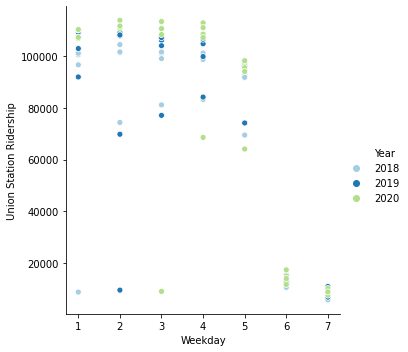

In [6]:
sns.relplot(x='Weekday',y='Union Station Ridership', data=jan_df,hue='Year',palette='Paired')

We notice one outliner by year where there is very little Riderships: the 1st of January.

Let's check our average Riderships for Union Station. 

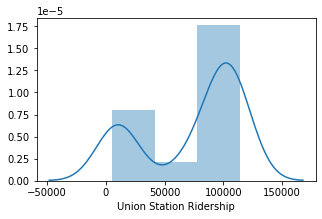

In [7]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(jan_df['Union Station Ridership'])

In [0]:
# Now let's divide the data into attributes ('Weekday') and labels ('Union Station Riderships').

X=jan_df['Weekday'].values.reshape(-1,1)
y=jan_df['Union Station Ridership'].values.reshape(-1,1)

In [0]:
#Split the data to 20% of the data to test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Train the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[133086.70290928]
[[-15336.91472794]]


In [0]:
y_pred = regressor.predict(X_test)

In [13]:
# Let's use our test data and see how accurately our algorithm predicts the percentage score.

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).round()
df

,Actual,Predicted
0,81222,87076.0
1,104331,87076.0
2,96768,56402.0
3,101709,87076.0
4,9598,25728.0
5,92037,117750.0
6,99938,71739.0
7,109227,102413.0
8,84255,71739.0
9,112993,71739.0


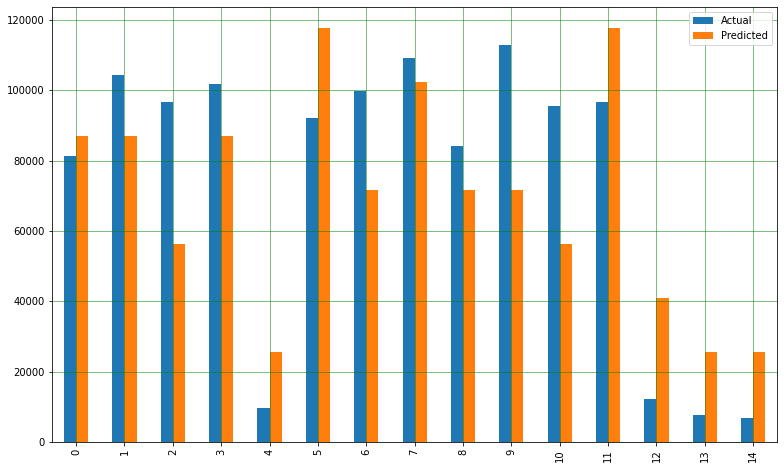

In [14]:
# Let's plot our results 


df1 = df.head(15)
df1.plot(kind='bar',figsize=(13,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Even though the model may lack precision, it is a good predictor of more busy days (Weekdays) vs. less busy days (Weekends). Would we get a more precise model using a full year and removing the outliers? We will look at this in part 2.